WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


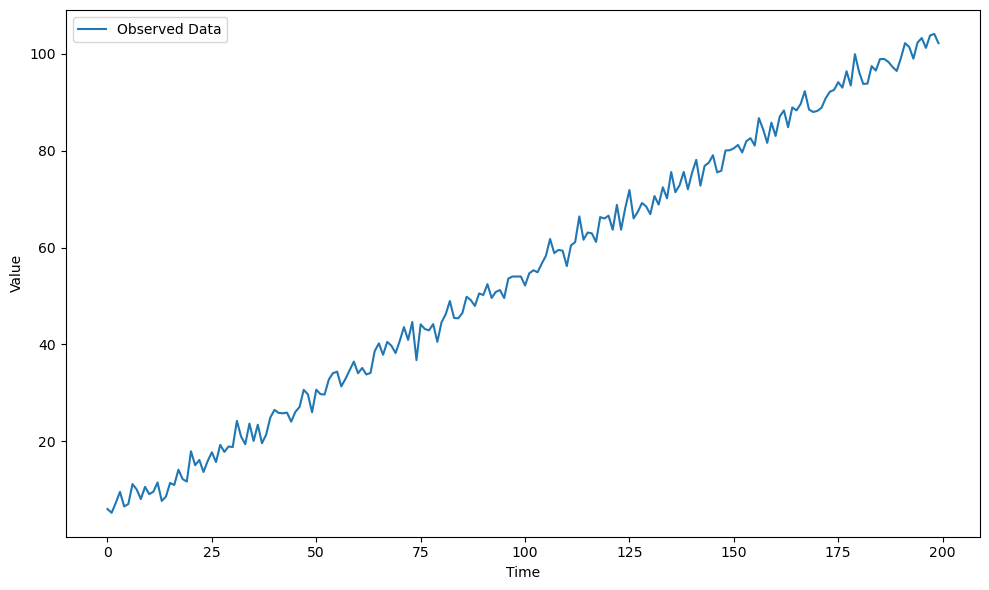

Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [phi, sigma, y_obs]


Output()

/opt/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:3079: RuntimeWarning: overflow encountered in 
exp
  return np.exp(x)

/opt/anaconda3/lib/python3.12/site-packages/pytensor/scalar/basic.py:3185: RuntimeWarning: overflow encountered in 
scalar multiply
  return x * x

/opt/anaconda3/lib/python3.12/site-packages/pytensor/tensor/elemwise.py:735: RuntimeWarning: overflow encountered 
in square
  variables = ufunc(*ufunc_args, **ufunc_kwargs)

/opt/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in 
reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)

Output()

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x1063d3b00>>
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 


ValueError: Not enough samples to build a trace.

In [2]:
import pymc as pm
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import arviz as az

# Simulated Time Series Data
np.random.seed(42)
n = 200
x = np.arange(n)
y = 5 + 0.5 * x + np.random.normal(0, 2, n)  # Linear trend with noise

# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Observed Data")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("observed_data.png")
plt.show()

# Bayesian AR(1) Model
with pm.Model() as model:
    # Priors for AR(1) parameters
    phi = pm.Normal("phi", mu=0, sigma=1)  # AR coefficient
    sigma = pm.HalfNormal("sigma", sigma=1)  # Noise term

    # Initial value for GaussianRandomWalk
    init_dist = pm.Normal.dist(0, 10)
    y_obs = pm.GaussianRandomWalk("y_obs", sigma=sigma, init_dist=init_dist, shape=n)

    # Likelihood
    y_like = pm.Normal("y_like", mu=y_obs, sigma=sigma, observed=y)

    # Sample the posterior
    trace = pm.sample(1000, tune=1000, return_inferencedata=True, cores=1)

# Plot Results
az.plot_trace(trace)
plt.tight_layout()
plt.savefig("bayesian.png")
plt.show()

# Posterior Predictive Sampling
with model:
    posterior_predictive = pm.sample_posterior_predictive(trace)


# Inspect the shape of posterior_samples
print(f"Original shape of posterior_samples: {posterior_samples.shape}")

# Ensure correct shape: (num_samples, num_time_points)
posterior_samples = posterior_samples.squeeze()  # Remove any singleton dimensions
print(f"Shape after squeeze: {posterior_samples.shape}")

# Check dimensionality; if still (1000, 1, 100), reshape or index
if posterior_samples.ndim > 2:
    posterior_samples = posterior_samples[:, 0, :]  # Remove the redundant dimension
    print(f"Shape after indexing: {posterior_samples.shape}")

# Compute posterior mean and credible intervals
posterior_mean = posterior_samples.mean(axis=0)  # Reduce to (100,)
lower_bound = np.percentile(posterior_samples, 2.5, axis=0)  # Reduce to (100,)
upper_bound = np.percentile(posterior_samples, 97.5, axis=0)  # Reduce to (100,)

# Validate shapes before plotting
print(f"x shape: {x.shape}, posterior_mean shape: {posterior_mean.shape}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Observed Data")
plt.plot(x, posterior_mean, label="Posterior Mean", color='r')
plt.fill_between(x, lower_bound, upper_bound, color='r', alpha=0.3, label="95% Credible Interval")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("observed_predicted.png")
plt.show()




Original shape of posterior_samples: (2, 1000, 100)
Shape after squeeze: (2, 1000, 100)
Shape after indexing: (2, 100)
x shape: (100,), posterior_mean shape: (100,)


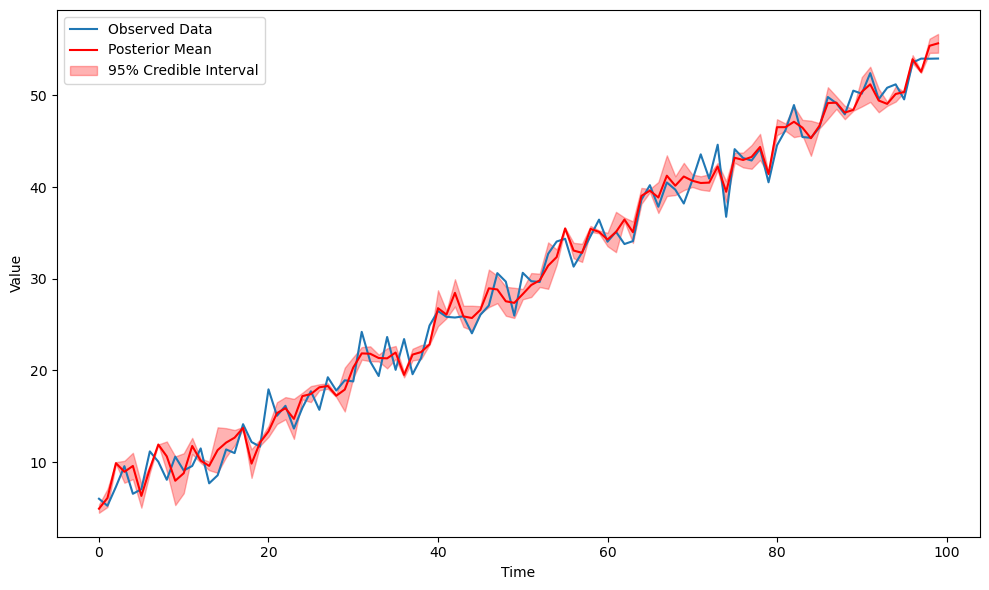

In [38]:
# Inspect the shape of posterior_samples
print(f"Original shape of posterior_samples: {posterior_samples.shape}")

# Ensure correct shape: (num_samples, num_time_points)
posterior_samples = posterior_samples.squeeze()  # Remove any singleton dimensions
print(f"Shape after squeeze: {posterior_samples.shape}")

# Check dimensionality; if still (1000, 1, 100), reshape or index
if posterior_samples.ndim > 2:
    posterior_samples = posterior_samples[:, 0, :]  # Remove the redundant dimension
    print(f"Shape after indexing: {posterior_samples.shape}")

# Compute posterior mean and credible intervals
posterior_mean = posterior_samples.mean(axis=0)  # Reduce to (100,)
lower_bound = np.percentile(posterior_samples, 2.5, axis=0)  # Reduce to (100,)
upper_bound = np.percentile(posterior_samples, 97.5, axis=0)  # Reduce to (100,)

# Validate shapes before plotting
print(f"x shape: {x.shape}, posterior_mean shape: {posterior_mean.shape}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(x, y, label="Observed Data")
plt.plot(x, posterior_mean, label="Posterior Mean", color='r')
plt.fill_between(x, lower_bound, upper_bound, color='r', alpha=0.3, label="95% Credible Interval")
plt.xlabel("Time")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()



In [54]:

# Compute MAPE
mape = np.mean(np.abs((y - posterior_mean) / y)) * 100

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Percentage Error (MAPE): 7.06%


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=640.281, Time=0.02 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=730.051, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=686.238, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=633.262, Time=0.01 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=732.791, Time=0.00 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=634.551, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=631.364, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=648.429, Time=0.01 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=647.903, Time=0.01 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=634.424, Time=0.01 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=691.436, Time=0.00 sec

Best model:  ARIMA(0,1,2)(0,0,0)[0] intercept
Total fit time: 0.106 seconds
Mean Absolute Percentage Error (MAPE): 1.81%


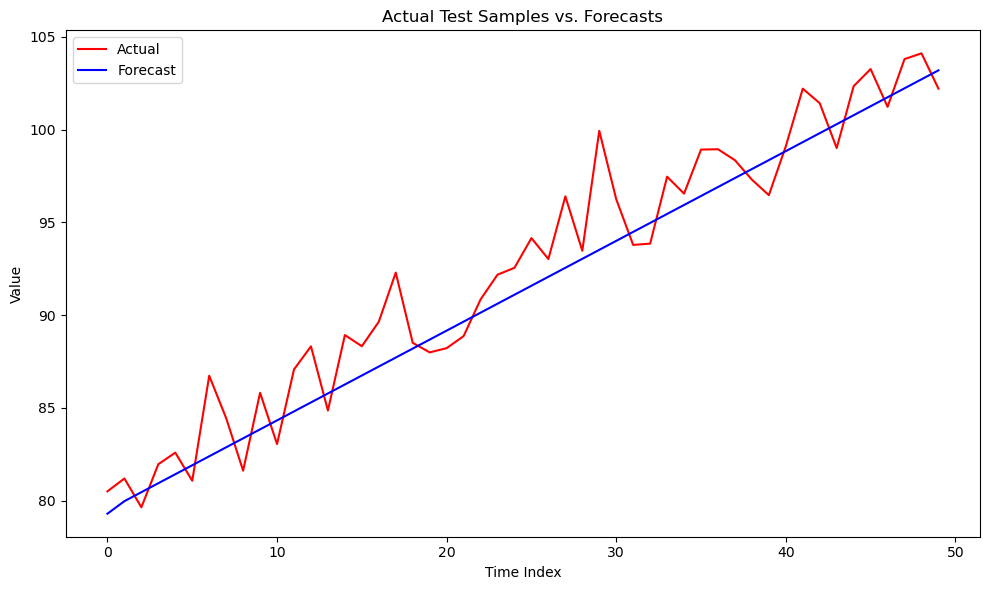

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pmd
from pmdarima import model_selection

# Train-Test Split
train, test = model_selection.train_test_split(y, train_size=150)

# Fit an ARIMA model using auto_arima
arima = pmd.auto_arima(
    train,
    error_action="ignore",
    trace=True,
    suppress_warnings=True,
    seasonal=False,  # Set to False as the data lacks seasonality
    maxiter=5
)

# Forecast on the test set
forecasts = arima.predict(n_periods=test.shape[0])

# Calculate MAPE
mape = np.mean(np.abs((test - forecasts) / test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Plot actual test vs. forecasts
x_test = np.arange(test.shape[0])
plt.figure(figsize=(10, 6))
plt.plot(x_test, test, color="red", label="Actual")
plt.plot(x_test, forecasts, color="blue", label="Forecast")
plt.title("Actual Test Samples vs. Forecasts")
plt.xlabel("Time Index")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.savefig("pdmarima.png")
plt.show()

In [ ]:
pip freeze > requirements.txt